# Program to predict the salary of the employee

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load data
df=pd.read_csv("1000 Records.csv")
df

,Emp ID,Name Prefix,First Name,Middle Initial,Last Name,Gender,E Mail,Father's Name,Mother's Name,Mother's Maiden Name,...,SSN,Phone No.,Place Name,County,City,State,Zip,Region,User Name,Password
0,850297,Ms.,Shawna,W,Buck,F,shawna.buck@gmail.com,Rosario Buck,Keisha Buck,Hendricks,...,222-11-7603,702-771-7149,Las Vegas,Clark,Las Vegas,NV,89128,West,swbuck,ja8?k3BTF^]o@<&
1,304721,Mr.,Nathaniel,Z,Burke,M,nathaniel.burke@walmart.com,Derrick Burke,Phoebe Burke,Pugh,...,550-99-9897,231-765-6923,Irons,Lake,Irons,MI,49644,Midwest,nzburke,tPA@4Wh9Ja$+Ln
2,412317,Drs.,Elisabeth,W,Foster,F,elisabeth.foster@gmail.com,Irwin Foster,Janie Foster,Delaney,...,215-91-0004,270-749-4774,Lexington,Fayette,Lexington,KY,40501,South,ewfoster,5D.B4IGNkWJfG<~
3,621375,Mrs.,Briana,C,Lancaster,F,briana.lancaster@yahoo.com,Jeffrey Lancaster,Shelby Lancaster,Weiss,...,534-71-1053,219-623-8216,Munster,Lake,Munster,IN,46321,Midwest,bclancaster,I%?JDM;pW
4,787549,Hon.,Estella,L,Potter,F,estella.potter@gmail.com,Booker Potter,Katelyn Potter,Pate,...,644-29-6396,907-677-8486,Fairbanks,Fairbanks North Star,Fairbanks,AK,99709,West,elpotter,j4jkEXfC&Rh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,568435,Ms.,Bonnie,K,Baker,F,bonnie.baker@bp.com,Edwardo Baker,Pauline Baker,Robinson,...,064-02-6162,262-696-9171,Mukwonago,Waukesha,Mukwonago,WI,53149,Midwest,bkbaker,a?Co:/r;nu_wTQ
996,597409,Mr.,Luke,S,Turner,M,luke.turner@charter.net,Javier Turner,Nicole Turner,Sykes,...,056-02-8240,231-629-0498,Freeport,Barry,Freeport,MI,49325,Midwest,lsturner,7n5@64VC7|
997,359608,Hon.,Eva,S,Holman,F,eva.holman@hotmail.com,Coy Holman,Haley Holman,Boyle,...,343-11-1935,209-912-6705,Turlock,Stanislaus,Turlock,CA,95381,West,esholman,DG<<<e}*WgD<U
998,803426,Mrs.,Maritza,H,Christian,F,maritza.christian@microsoft.com,Dion Christian,Stephanie Christian,Mooney,...,336-11-5030,203-224-9056,Stamford,Fairfield,Stamford,CT,6910,Northeast,mhchristian,Krs@#TnM


# Basic statistics

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Emp ID                  1000 non-null   int64  
 1   Name Prefix             1000 non-null   object 
 2   First Name              1000 non-null   object 
 3   Middle Initial          1000 non-null   object 
 4   Last Name               1000 non-null   object 
 5   Gender                  1000 non-null   object 
 6   E Mail                  1000 non-null   object 
 7   Father's Name           1000 non-null   object 
 8   Mother's Name           1000 non-null   object 
 9   Mother's Maiden Name    1000 non-null   object 
 10  Date of Birth           1000 non-null   object 
 11  Time of Birth           1000 non-null   object 
 12  Age in Yrs.             1000 non-null   float64
 13  Weight in Kgs.          1000 non-null   int64  
 14  Date of Joining         1000 non-null   o

In [4]:
df.describe()

,Emp ID,Age in Yrs.,Weight in Kgs.,Year of Joining,Month of Joining,Day of Joining,Age in Company (Years),Salary,Zip
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,549097.583000,40.377250,59.409000,2006.992000,6.415000,16.481000,10.093720,120288.528000,48698.499000
std,264810.879315,11.107729,13.900322,8.565588,3.428488,8.831514,8.568863,45178.339916,27396.021481
min,114425.000000,21.040000,40.000000,1980.000000,1.000000,1.000000,0.000000,40040.000000,1002.000000
25%,307757.000000,30.925000,49.000000,2002.000000,4.000000,9.000000,3.152500,82122.000000,25421.750000
50%,543073.000000,40.730000,57.000000,2009.000000,6.000000,17.000000,7.815000,119409.000000,47416.500000
75%,788450.250000,49.852500,68.000000,2014.000000,10.000000,24.000000,15.465000,159109.000000,71101.000000
max,999475.000000,59.980000,90.000000,2017.000000,12.000000,31.000000,37.570000,199943.000000,99791.000000


In [5]:
df.columns

Index(['Emp ID', 'Name Prefix', 'First Name', 'Middle Initial', 'Last Name',
       'Gender', 'E Mail', 'Father's Name', 'Mother's Name',
       'Mother's Maiden Name', 'Date of Birth', 'Time of Birth', 'Age in Yrs.',
       'Weight in Kgs.', 'Date of Joining', 'Quarter of Joining',
       'Half of Joining', 'Year of Joining', 'Month of Joining',
       'Month Name of Joining', 'Short Month', 'Day of Joining',
       'DOW of Joining', 'Short DOW', 'Age in Company (Years)', 'Salary',
       'Last % Hike', 'SSN', 'Phone No. ', 'Place Name', 'County', 'City',
       'State', 'Zip', 'Region', 'User Name', 'Password'],
      dtype='object')

In [6]:
df.shape

(1000, 37)

# Dropping variables which are not needed

In [7]:
df.drop(['Emp ID', 'First Name','Middle Initial', 'Last Name',
        'E Mail', "Father's Name", "Mother's Name",
       "Mother's Maiden Name", 'Date of Birth', 'Time of Birth', 'Date of Joining', 'Quarter of Joining',
       'Half of Joining',
       'Month Name of Joining', 'Short Month',
       'DOW of Joining', 'Short DOW','Last % Hike', 'SSN', 'Phone No. ', 'Place Name', 'County', 'City',
       'State', 'Zip', 'Region', 'User Name', 'Password','Name Prefix'],axis=1,inplace=True)
df

,Gender,Age in Yrs.,Weight in Kgs.,Year of Joining,Month of Joining,Day of Joining,Age in Company (Years),Salary
0,F,45.66,44,2010,12,18,6.61,119090
1,M,23.76,52,2017,4,25,0.26,117991
2,F,22.68,42,2017,3,27,0.34,161045
3,F,41.70,43,2003,2,25,14.43,142616
4,F,22.39,58,2016,10,11,0.79,135706
...,...,...,...,...,...,...,...,...
995,F,32.01,59,2008,1,7,9.56,72930
996,M,30.48,84,2010,3,5,7.40,121949
997,F,59.88,50,2001,2,20,16.44,82734
998,F,30.21,48,2012,3,15,5.37,66854



 The attribute sex can related to the salary . so we change the gender variables to numeric

In [8]:
df["Gender"].value_counts()

M    509
F    491
Name: Gender, dtype: int64

In [9]:
#convert Gender attribute of dtype object to integer
df["Gender"]=df['Gender'].map({'M': 0, 'F': 1}).astype(int)
df

,Gender,Age in Yrs.,Weight in Kgs.,Year of Joining,Month of Joining,Day of Joining,Age in Company (Years),Salary
0,1,45.66,44,2010,12,18,6.61,119090
1,0,23.76,52,2017,4,25,0.26,117991
2,1,22.68,42,2017,3,27,0.34,161045
3,1,41.70,43,2003,2,25,14.43,142616
4,1,22.39,58,2016,10,11,0.79,135706
...,...,...,...,...,...,...,...,...
995,1,32.01,59,2008,1,7,9.56,72930
996,0,30.48,84,2010,3,5,7.40,121949
997,1,59.88,50,2001,2,20,16.44,82734
998,1,30.21,48,2012,3,15,5.37,66854


# finding missing values

In [10]:
#checking missing value
df.isnull().sum()

Gender                    0
Age in Yrs.               0
Weight in Kgs.            0
Year of Joining           0
Month of Joining          0
Day of Joining            0
Age in Company (Years)    0
Salary                    0
dtype: int64

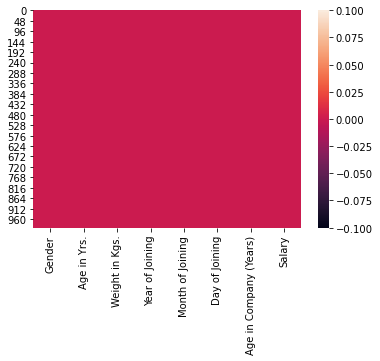

In [11]:
#missing value in data visuvalization
sns.heatmap(df.isnull())

obervation:    there are no null values(NaN) in the dataset

# EDA

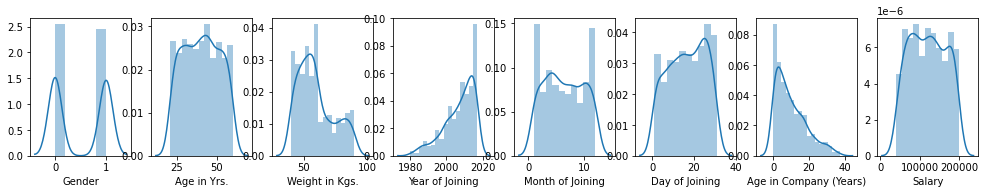

In [12]:
#univariate analysis
collist=df.columns.values
ncol=14
nrow=10
plt.figure(figsize=(30,30))
for i in range(0,len(collist)):
    plt.subplot(nrow,ncol,i+1)
    sns.distplot(df[collist[i]])

KEY OBSERVATION

1)Both the gender male=0 and Female=1 are in same numbers

2)Most of the working people is of age from 20's to 50's. the max number of people working were in age of 30's

3)in the "Year of joining" we see linear regression as the year passes more people were joined in the company

4)from "Age in Company" we can see there are very less person worked in the company for a long time.

5) the salary column shows that the distribution is normal

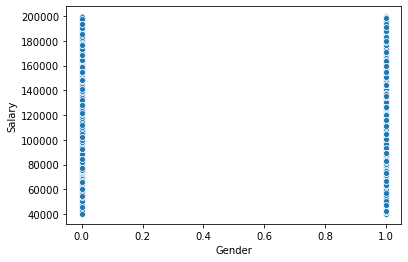

In [13]:
#Bivariate Analysis
sns.scatterplot(x="Gender",y="Salary",data=df)

it shows that both gender male=0 and female=1 are getting equal proportion of salary

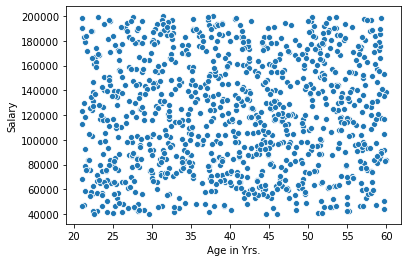

In [14]:
sns.scatterplot(x="Age in Yrs.",y="Salary",data=df)

It shows that the all preson receives salary from 40000(min) to 200000(max) irrespective of their age 

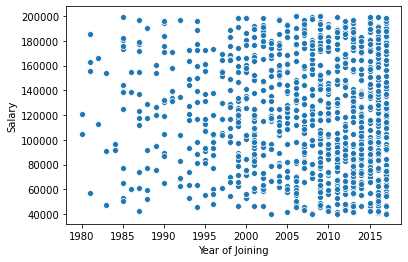

In [15]:
sns.scatterplot(x="Year of Joining",y="Salary",data=df)

It shows that there are very few persons worked at the year 1980. As year progress more people started to join and work

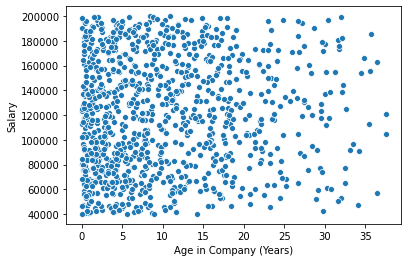

In [16]:
sns.scatterplot(x="Age in Company (Years)",y="Salary",data=df)

it shows that large number of employees where new to the company and very less employees were workinh for a very long period in the same company

# correlation values


In [17]:
#multivariate analysis
dfcor=df.corr()
dfcor

,Gender,Age in Yrs.,Weight in Kgs.,Year of Joining,Month of Joining,Day of Joining,Age in Company (Years),Salary
Gender,1.000000,0.013794,-0.713811,-0.047214,-0.015040,0.002001,0.047735,-0.050883
Age in Yrs.,0.013794,1.000000,-0.065656,-0.676875,0.022617,-0.026387,0.676408,0.041422
Weight in Kgs.,-0.713811,-0.065656,1.000000,0.058794,0.003933,-0.038591,-0.058846,0.061088
Year of Joining,-0.047214,-0.676875,0.058794,1.000000,-0.029644,0.040820,-0.999435,-0.053501
Month of Joining,-0.015040,0.022617,0.003933,-0.029644,1.000000,0.046362,-0.003848,-0.019298
Day of Joining,0.002001,-0.026387,-0.038591,0.040820,0.046362,1.000000,-0.045185,-0.018947
Age in Company (Years),0.047735,0.676408,-0.058846,-0.999435,-0.003848,-0.045185,1.000000,0.054212
Salary,-0.050883,0.041422,0.061088,-0.053501,-0.019298,-0.018947,0.054212,1.000000


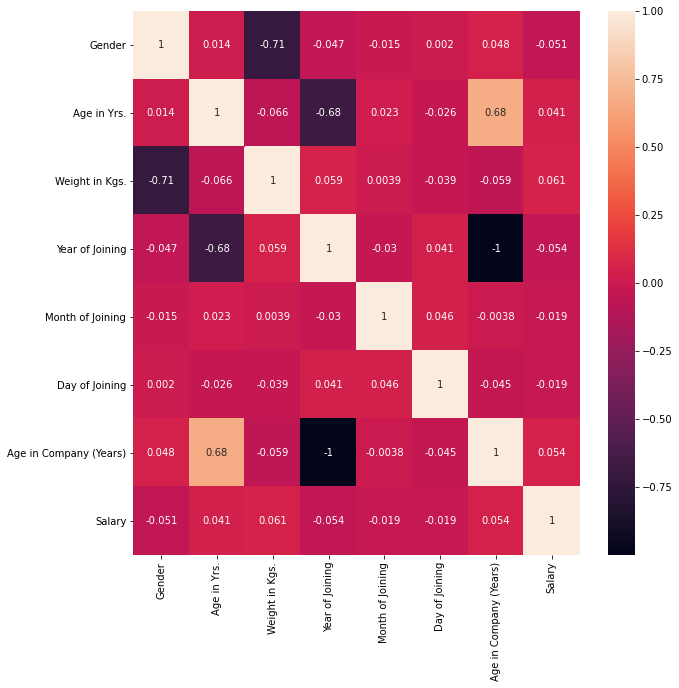

In [18]:
#correlation in visuvalization
plt.figure(figsize=(10,10))
sns.heatmap(dfcor,annot=True)

Key observation

from the above result it is clear that some columns making positive correlation while some has negative correlation to the target variable 

columns making positive correlation with salary

1) Age in Company (Years)

2) age in years

3) weight in kgs


columns making negative correlation

1)date of joining

2)month of joining

3)year of joining

4)gender

# checking skewness

In [19]:
df.skew()

Gender                    0.036060
Age in Yrs.               0.006173
Weight in Kgs.            0.657110
Year of Joining          -0.958797
Month of Joining          0.057287
Day of Joining           -0.143305
Age in Company (Years)    0.968211
Salary                    0.034356
dtype: float64

Range of Skewness is (+/- 0.5)
from the above observation the following columns falls under high skewness

1) Weight in kgs

2)Year of Joining

3) Age in company(years) 


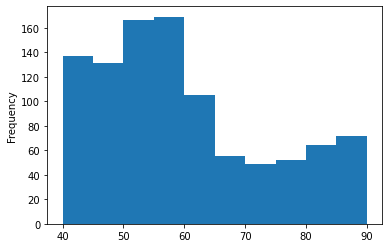

In [20]:
#Graphival representation of skewdness
df["Weight in Kgs."].plot.hist()

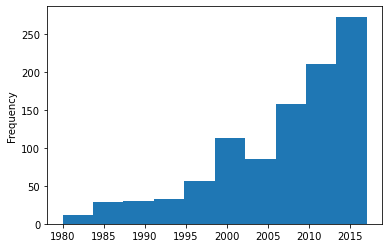

In [21]:
df["Year of Joining"].plot.hist()

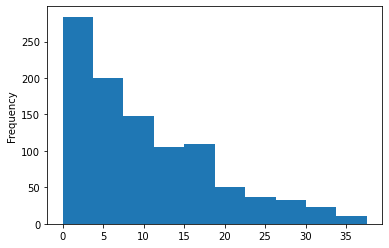

In [22]:
df["Age in Company (Years)"].plot.hist()

# Removing Skewness

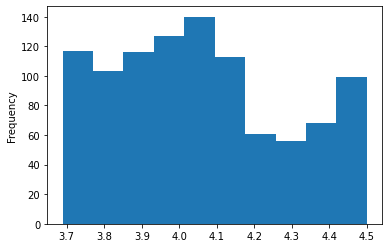

In [23]:
#removing skewness using boxcox
from scipy.stats import boxcox
df["Weight in Kgs."]=boxcox(df["Weight in Kgs."],0) #0 represents log transform
df["Weight in Kgs."].plot.hist()

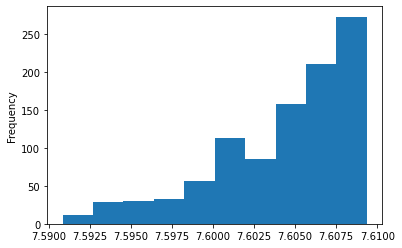

In [24]:
#removing skewness using boxcox
from scipy.stats import boxcox
df["Year of Joining"]=boxcox(df["Year of Joining"],0) #0 represents log transform
df["Year of Joining"].plot.hist()

# plotting outliers

Gender                       AxesSubplot(0.125,0.536818;0.168478x0.343182)
Age in Yrs.               AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Weight in Kgs.            AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Year of Joining           AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Month of Joining                AxesSubplot(0.125,0.125;0.168478x0.343182)
Day of Joining               AxesSubplot(0.327174,0.125;0.168478x0.343182)
Age in Company (Years)       AxesSubplot(0.529348,0.125;0.168478x0.343182)
Salary                       AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

<Figure size 720x720 with 0 Axes>

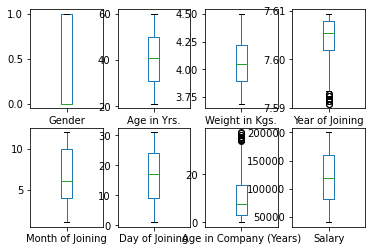

In [25]:
plt.figure(figsize=(10,10))
df.plot(kind="box",subplots=True,layout=(2,4))

OBSERVATION

we can find some outliers in "Year of joining" and "Age in company(years)"

# Removing outliers



In [26]:
#removing outliers using zscore
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.01816496, 0.47583025, 1.21232672, ..., 0.17208376, 0.40675913,
        0.02654209],
       [0.98215912, 1.49675646, 0.47366808, ..., 0.96509647, 1.14818509,
        0.05088008],
       [1.01816496, 1.59403471, 1.41802305, ..., 1.19167153, 1.1388443 ,
        0.90257556],
       ...,
       [1.01816496, 1.75666052, 0.64708927, ..., 0.39865882, 0.74099162,
        0.83166667],
       [1.01816496, 0.91578914, 0.82759081, ..., 0.16777883, 0.55154152,
        1.18333842],
       [1.01816496, 1.74765327, 0.14598681, ..., 0.05879623, 3.20579511,
        0.33704522]])

In [27]:
print(np.where(z>3))

(array([594, 594, 606, 621, 621, 684, 684, 895, 999, 999], dtype=int64), array([3, 6, 3, 3, 6, 3, 6, 3, 3, 6], dtype=int64))


In [28]:
threshold=3
df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Age in Yrs.,Weight in Kgs.,Year of Joining,Month of Joining,Day of Joining,Age in Company (Years),Salary
0,1,45.66,3.784190,7.605890,12,18,6.61,119090
1,0,23.76,3.951244,7.609367,4,25,0.26,117991
2,1,22.68,3.737670,7.609367,3,27,0.34,161045
3,1,41.70,3.761200,7.602401,2,25,14.43,142616
4,1,22.39,4.060443,7.608871,10,11,0.79,135706
...,...,...,...,...,...,...,...,...
994,0,28.61,4.290459,7.609367,6,21,0.10,84585
995,1,32.01,4.077537,7.604894,1,7,9.56,72930
996,0,30.48,4.430817,7.605890,3,5,7.40,121949
997,1,59.88,3.912023,7.601402,2,20,16.44,82734


# preparing dataset for model training

seperating independent and dependent variable

In [29]:
x=df_new.drop("Salary",axis=1)
y=df_new["Salary"]

# Regressor model building:

Linear Regression

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=42)

In [31]:
x_train.shape

(775, 7)

In [32]:
y_train.shape

(775,)

In [33]:
x_test.shape

(219, 7)

In [34]:
y_test.shape

(219,)

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score

# REGULARIZATION

1)LASSO

In [36]:
#TO find the baet parameters

from sklearn.linear_model import Lasso
parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'alpha': 10, 'random_state': 0}


In [37]:
ls=Lasso(alpha=10,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred=ls.predict(x_test)
pred
r2score=r2_score(y_test,pred)
cvscore=cross_val_score(ls,x_train,y_train,cv=10).mean()
print( f"Accuracy={r2score*100},\ncross_value_score={cvscore*100},\nand difference={(r2score*100)-(cvscore*100)}")


Accuracy=-0.26134617683317707,
cross_value_score=-2.261622831689587,
and difference=2.00027665485641


2) LINEAR REGRESSION

In [38]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")


Accuracy=-0.16052852445442856,cross_value_score=-2.189524458761256,and difference=2.0289959343068276


In [39]:
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LinearRegression(),x_train,y_train,cv=5).mean()
print( f"Accuracy={r2score*100},cross_value_score={cvscore*100},and difference={(r2score*100)-(cvscore*100)}")


Accuracy=-0.16052852445442856,cross_value_score=-2.189524458761256,and difference=2.0289959343068276


here we observe from all algorithm taht the r2 score and cross_val_score is in negative manner which clearely tell we need more data to get added to the dataset inorder for better accuracy.

# Conclusion

  more feature engineering is needed.


# saving dataset

In [40]:
import joblib
joblib.dump(SGD,"employee_salary.pkl")


['employee_salary.pkl']